In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [68]:
bs = pd.read_csv("./SVM5G_Datasets/BS.csv")

bs.describe()

,BSLat,BSLon,BSResources,BSRange
count,6.000000,6.000000,6.0,6.000000
mean,5.411667,6.136667,0.0,2.596667
std,3.862784,3.034532,0.0,0.276381
min,1.110000,2.170000,0.0,2.100000
25%,3.465000,3.800000,0.0,2.525000
50%,4.710000,6.660000,0.0,2.660000
75%,6.037500,8.177500,0.0,2.780000
max,12.410000,9.800000,0.0,2.860000


In [69]:
users = pd.read_csv("./SVM5G_Datasets/Users.csv")

users.describe()

,ULat,ULon,UDataRate
count,6.000000,6.000000,6.000000
mean,5.236667,7.388333,50.500000
std,3.336157,3.240428,54.224533
min,1.040000,1.320000,1.000000
25%,3.385000,6.902500,1.000000
50%,4.665000,8.305000,50.500000
75%,6.860000,9.542500,100.000000
max,10.500000,10.010000,100.000000


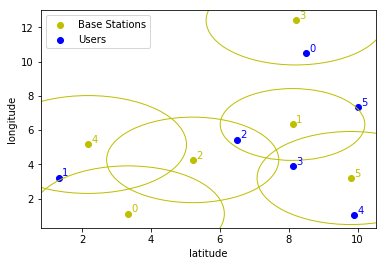

In [79]:
BSPos = bs[['BSLat','BSLon']]
UPos = users[['ULat','ULon']]

fig, ax = plt.subplots()
    
# Plotting BS and Users positions 
ax.scatter(BSPos['BSLon'],BSPos['BSLat'], color='y')
ax.scatter(UPos['ULon'], UPos['ULat'], color='b')
plt.ylabel('longitude')
plt.xlabel('latitude')
ax.legend(['Base Stations', 'Users'])

for i,j in bs.iterrows():
    
    # Plotting BS range
    pos = (j['BSLon'], j['BSLat'])
    circle = plt.Circle(pos, j['BSRange'], color='y', fill=False)
    ax.add_artist(circle)
    
    #Plotting BS index
    ax.annotate(i, (j['BSLon']+0.1, j['BSLat']+0.1), color='y')
    
for i,j in users.iterrows():
    
    #Plotting user index
    ax.annotate(i, (j['ULon']+0.1, j['ULat']+0.1), color='b')

Computing distances between users (rows) and BS (columns):

In [84]:
distances = pd.DataFrame()
for ui,uj in users.iterrows():
    for bsi,bsj in bs.iterrows():
        distances.at[ui,bsi] = math.sqrt((uj['ULat'] - bsj['BSLat'])**2 + (uj['ULon'] - bsj['BSLon'])**2)
        
print (distances)

           0         1         2          3         4         5
0  10.719188  4.188198  7.054197   1.933417  8.281576  7.414850
1   2.914138  7.468347  4.026624  11.480004  2.118042  8.480024
2   5.374430  1.834802  1.755050   7.164607  4.339700  3.994058
3   5.524609  2.450000  2.924791   8.530475  6.076348  1.821675
4   6.560373  5.581442  5.680739  11.494912  8.750589  2.161874
5   9.127475  2.147091  5.697798   5.392819  8.134771  4.135336
